# FFT のいろはを勉強するnotebook

In [16]:
import numpy as np
import matplotlib.pyplot as plt

In [17]:
N = 4096 # サンプル数
s = N/256 # 標準偏差

In [23]:
# -N/2 から +N/2までの連番を、合計N個生成する
x = np.linspace(start=-N/2, stop=N/2, num=N)
print(max(x))
print(min(x))
print(len(x))

y = np.exp( -x**2 /(2.0*s**2) ) / (np.sqrt(2 * np.pi ) * s)

2048.0
-2048.0
4096


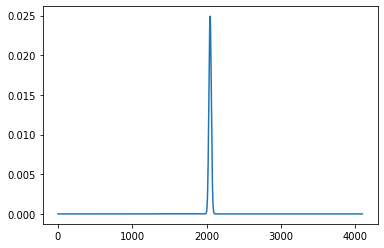

In [19]:
plt.plot(y)
plt.show()

C:\Users\tb\anaconda3\envs\protein\lib\site-packages\matplotlib\cbook\__init__.py:1333: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


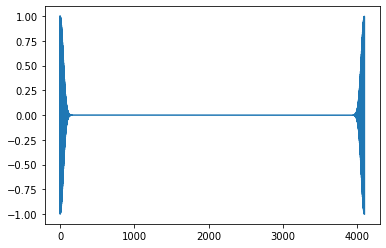

In [20]:
fk = np.fft.fft(y)
plt.plot(fk)

min = -0.5, max = 0.499755859375, len = 4096


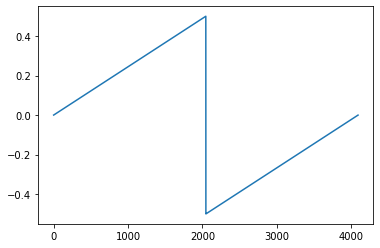

In [24]:
freq = np.fft.fftfreq(N)
plt.plot(freq)
print(f"min = {min(freq)}, max = {max(freq)}, len = {len(freq)}")

~フーリエ変換された結果の関数はkの偶関数であるから、k < 0 or k > 0 のどちらかだけを見ればいいことがわかる。~
なんかこれ正しいかわからない。下参照

C:\Users\tb\anaconda3\envs\protein\lib\site-packages\matplotlib\collections.py:206: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)


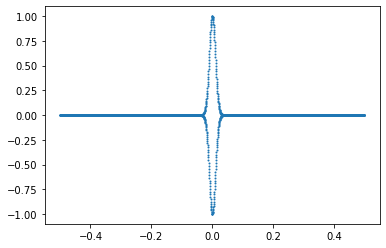

In [25]:
# 全部表示
plt.scatter(freq, fk, s=1)

C:\Users\tb\anaconda3\envs\protein\lib\site-packages\matplotlib\collections.py:206: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)


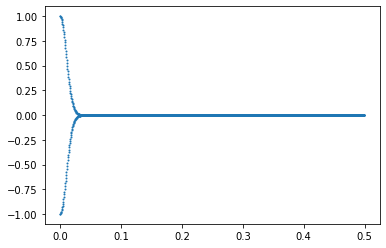

In [28]:
# 一部表示
plt.scatter(freq[:int(N/2)], fk[:int(N/2)], s=1)

f(k) = (-1)^k A_k

となることをqiita記事で説明されている。本当かわからないので、愚直にやってみる。

In [36]:
fk_positive = np.real(fk[np.real(fk)>0])
print(fk_positive)
print(np.real(fk))

[0.99975586 0.99855151 0.99494714 ... 0.98896876 0.99494714 0.99855151]
[ 0.99975586 -0.99945463  0.99855151 ... -0.9970481   0.99855151
 -0.99945463]


たしかにとびとびになっていることがわかる。

次に、qiita記事のabsをとるときの挙動を確認する。

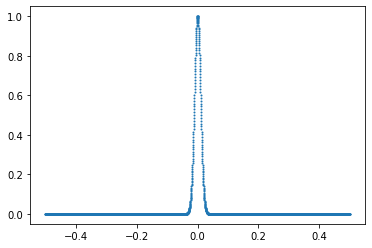

In [37]:
plt.scatter(freq,np.abs(fk),s=1)

ところで、np.abs()の挙動はこんな感じ

In [42]:
z = 7 + 13j
print(z)

np.abs(z)

(7+13j)


14.7648230602334

実部の正をとるのと、絶対値を取ったものを比較するの、正しいのはどちらか知りたい。

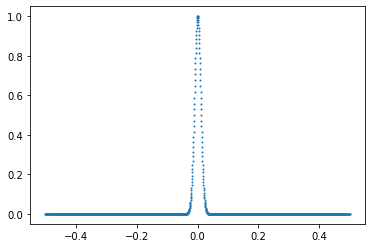

In [41]:
plt.scatter(freq[np.real(fk) > 0],np.real(fk)[np.real(fk) > 0],s=1)

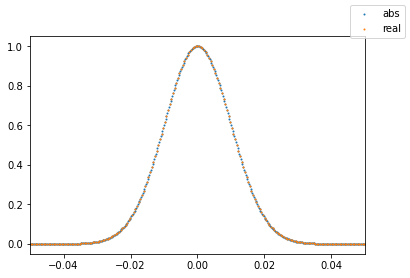

In [46]:
fig, ax = plt.subplots()

ax.set_xlim(-0.05, 0.05)
ax.scatter(freq,np.abs(fk),s=1, label="abs")
ax.scatter(freq[np.real(fk) > 0],np.real(fk)[np.real(fk) > 0],s=1, label="real")
fig.legend()

たぶん一致してる？詳しく調べられそうだけれど、ここはいったん次に進む。

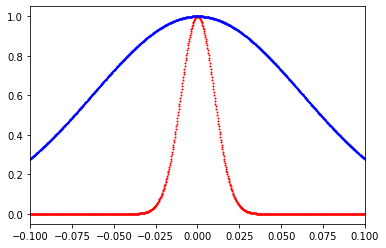

In [47]:
theory = np.exp(-freq**2*s**2/2.0)

fig, ax = plt.subplots()
ax.scatter(freq, np.abs(fk), s = 1, c = "red")  # DFTの結果
ax.scatter(freq,theory, s = 1, c="blue")        # 理論曲線
plt.xlim([-0.1,0.1])
plt.show()

理論値とのずれがあるように見えるが、これはフーリエ変換の定義が違うことによることが[ここ](https://numpy.org/doc/stable/reference/routines.fft.html#implementation-details)からわかる。理論式を修正して、プロットしてみる。

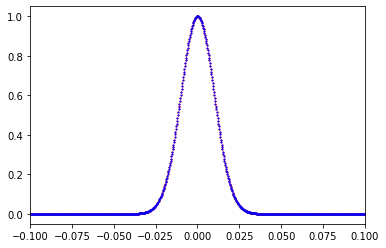

In [48]:
theory = np.exp(-(2*np.pi*freq)**2*s**2/2.0)

fig, ax = plt.subplots()
ax.scatter(freq, np.abs(fk), s = 1, c = "red")  # DFTの結果
ax.scatter(freq,theory, s = 1, c="blue")        # 理論曲線
plt.xlim([-0.1,0.1])
plt.show()

一致した。素晴らしい！

ところで、numpyのドキュメントにある 1/N が連続版の式のどれに対応するかと迷ってしまった。しかしこれは少し見方を変えればよくて、 x = m/N であることに気づけば、呑み込めるはず。